In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

#medium article link
#https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a


In [2]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
#boston.describe()  --- this produces an error because describe() is a method in pandas DataFrame 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

print(bos.head())

#check if there are null values
print(bos.isnull().sum())

#bos is a DataFrame object. hence no error when calling describe()
print(bos.describe())


      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.2

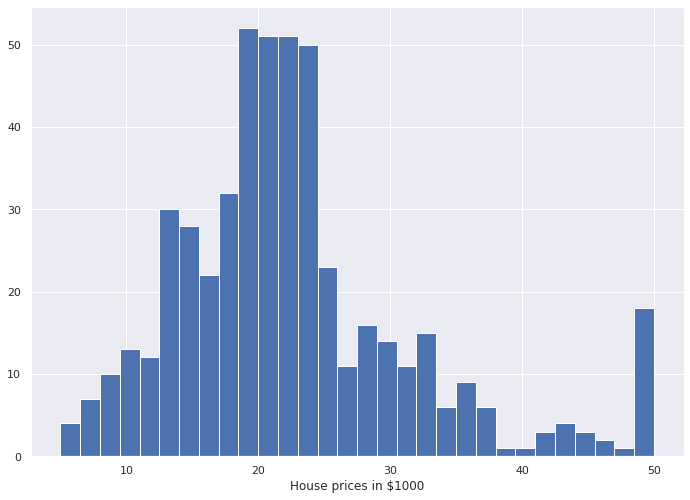

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

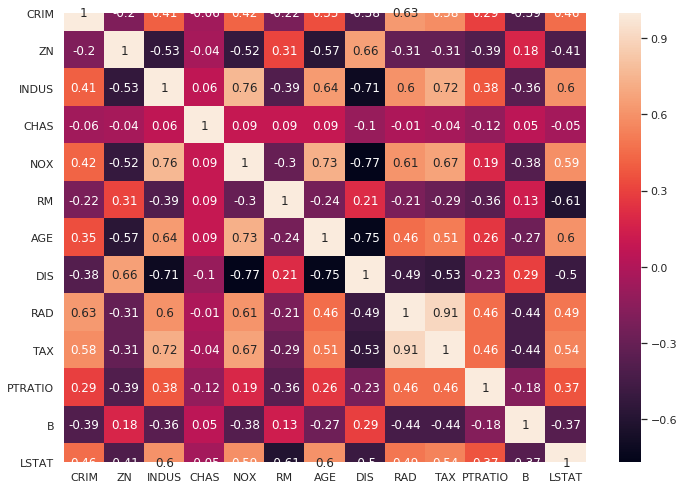

In [6]:
#Created a dataframe without the price col, since we need to see the correlation between the variables
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

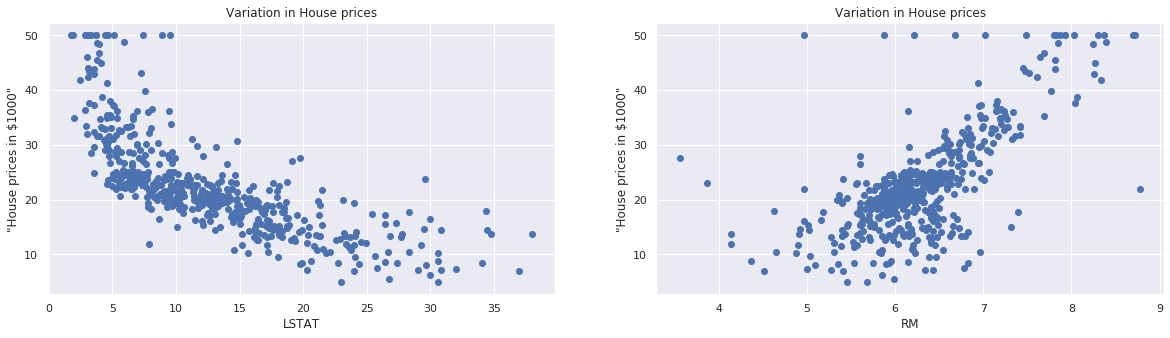

In [7]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')